In [1]:
# Libraries
library(ggplot2)
library(tidyverse)
library(reshape2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




## Rapel:
    Il s'agit de trouver des données sur internet (Kaggle, site de l'Insee, data.gov, data.gouv.fr, etc.) et de les étudier. Ce n'est pas utile de prendre une grosse base de données (mais pas interdit non plus). Ensuite il faut choisir une ou des grandeurs d'intérêt, construire un ou deux estimateurs et de tester leurs propriétés sur les données, en effectuant quelques calculs théoriques (si possible) et en visualisant les données et leurs propriétés. Vous pouvez travailler à 2 ou 3 par groupe.

## 1. Chargement des données
- Nous utilisons dans ce projet de le jeux de données sur les prix des maisons en Californie: [Source](https://www.kaggle.com/camnugent/california-housing-prices)
. Ce jeu de données des informations sur les maisons trouvées dans un district de Californie avec les information comme, la position géographique, le  nbre de chambre, le prix, etc.

1. **longitude**: mesure de la distance à l'ouest d'une maison; une valeur plus élevée est plus à l'ouest

2. **latitude**: mesure de la distance au nord d'une maison; une valeur plus élevée est plus au nord

3. **HousingMedianAge**: Âge médian d'une maison dans un pâté de maisons; un nombre inférieur est un bâtiment plus récent

4. **totalRooms**: nombre total de chambres dans un bloc

5. **totalBedrooms**: nombre total de chambres dans un bloc

6. **population**: nombre total de personnes résidant dans un bloc

7. **households**: nombre total de ménages, un groupe de personnes résidant dans une unité d'habitation, pour un bloc

8. **median_income**: revenu médian des ménages dans un pâté de maisons (mesuré en dizaines de milliers de dollars américains)

9. **medianHouseValue**: valeur médiane des maisons pour les ménages dans un pâté de maisons (mesurée en dollars américains)

In [38]:
# Lecture des données
maison = read.table("housing.csv",header=T,sep=",")
tail(maison)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
20635,-121.56,39.27,28,2332,395,1041,344,3.7125,116800,INLAND
20636,-121.09,39.48,25,1665,374,845,330,1.5603,78100,INLAND
20637,-121.21,39.49,18,697,150,356,114,2.5568,77100,INLAND
20638,-121.22,39.43,17,2254,485,1007,433,1.7000,92300,INLAND
20639,-121.32,39.43,18,1860,409,741,349,1.8672,84700,INLAND
20640,-121.24,39.37,16,2785,616,1387,530,2.3886,89400,INLAND


### 1.a A propos des données

In [39]:
#  dimension
dim <- dim(maison)
dim

[1] 20640    10

In [40]:
summary(maison)

   longitude         latitude     housing_median_age  total_rooms   
 Min.   :-124.3   Min.   :32.54   Min.   : 1.00      Min.   :    2  
 1st Qu.:-121.8   1st Qu.:33.93   1st Qu.:18.00      1st Qu.: 1448  
 Median :-118.5   Median :34.26   Median :29.00      Median : 2127  
 Mean   :-119.6   Mean   :35.63   Mean   :28.64      Mean   : 2636  
 3rd Qu.:-118.0   3rd Qu.:37.71   3rd Qu.:37.00      3rd Qu.: 3148  
 Max.   :-114.3   Max.   :41.95   Max.   :52.00      Max.   :39320  
                                                                    
 total_bedrooms     population      households     median_income    
 Min.   :   1.0   Min.   :    3   Min.   :   1.0   Min.   : 0.4999  
 1st Qu.: 296.0   1st Qu.:  787   1st Qu.: 280.0   1st Qu.: 2.5634  
 Median : 435.0   Median : 1166   Median : 409.0   Median : 3.5348  
 Mean   : 537.9   Mean   : 1425   Mean   : 499.5   Mean   : 3.8707  
 3rd Qu.: 647.0   3rd Qu.: 1725   3rd Qu.: 605.0   3rd Qu.: 4.7432  
 Max.   :6445.0   Max.   :35682   

Using ocean_proximity as id variables

Warning message:
“Removed 207 rows containing non-finite values (stat_bin).”


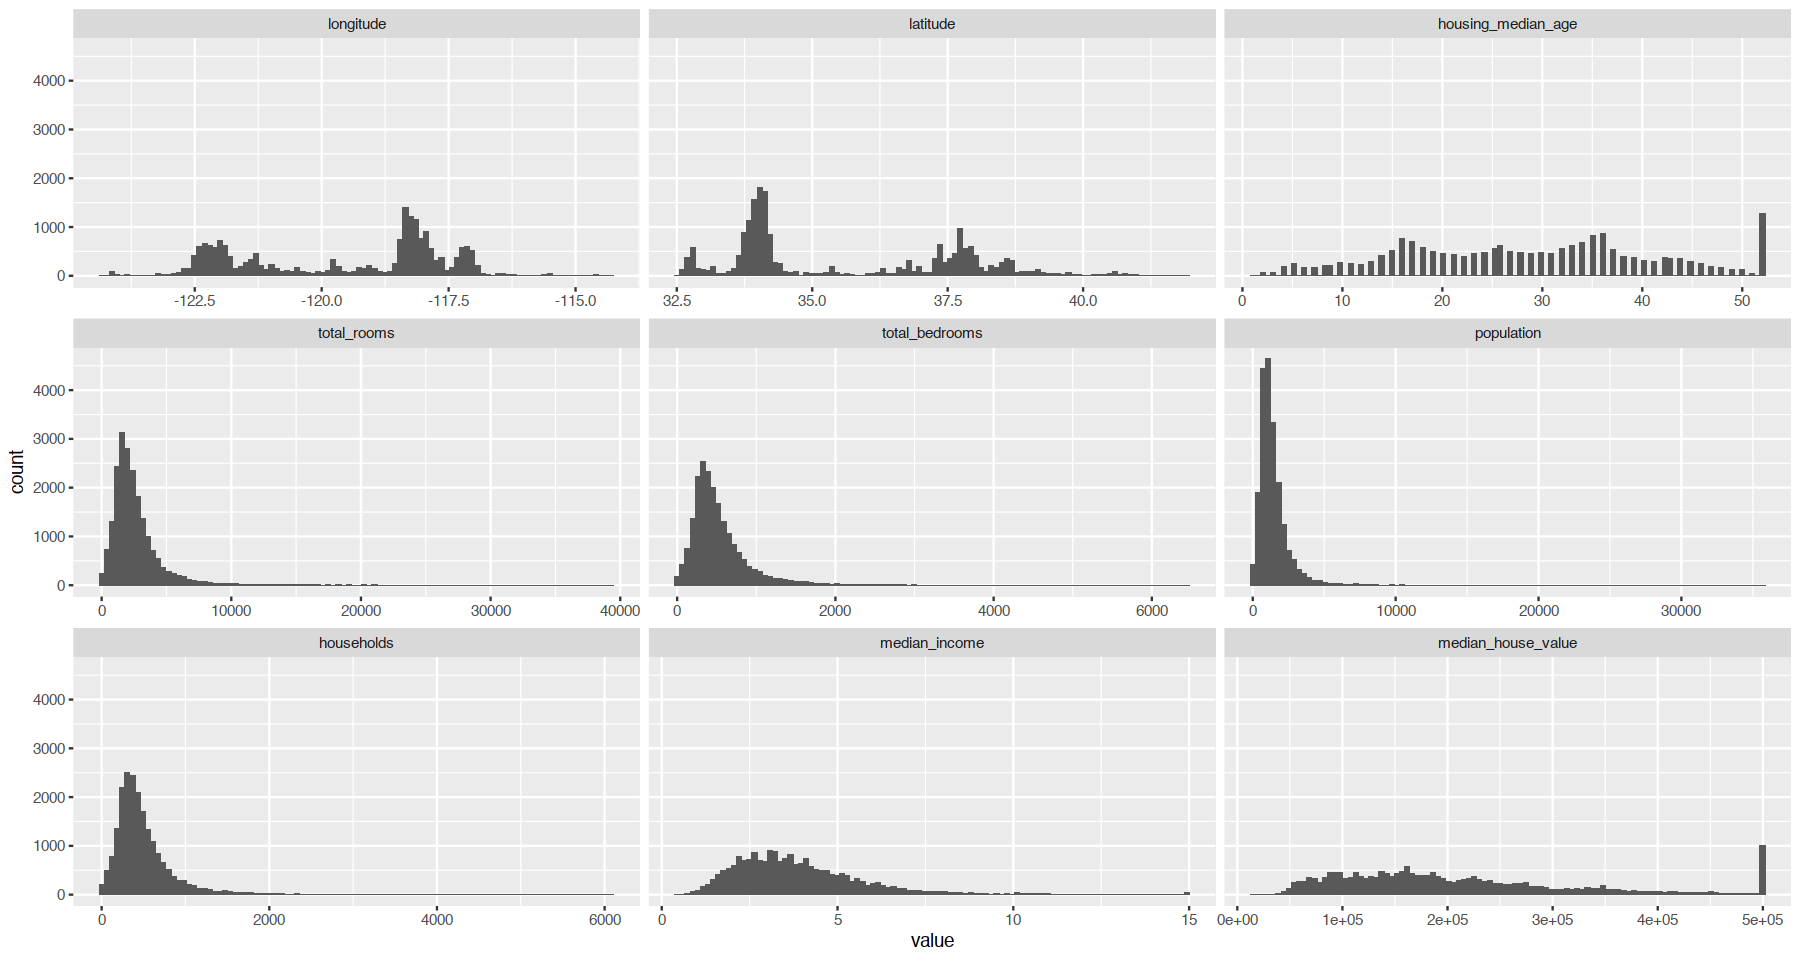

In [41]:
options(repr.plot.width=15, repr.plot.height=8)
ggplot(data = melt(maison), mapping = aes(x = value)) + 
    geom_histogram(bins = 100) + facet_wrap(~variable, scales = 'free_x')

In [42]:
# Somme NaN pour chaque variable
most_NA = colSums(is.na(maison))
# sort 
most_NA = sort(most_NA, decreasing = T) #  ordre descendnt
NAs = data.frame(Variable = names(most_NA)[1:10],
                  NAs = unname(most_NA)[1:10]) # creat a data.frame
NAs

Variable,NAs
<chr>,<dbl>
total_bedrooms,207
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
population,0
households,0
median_income,0
median_house_value,0


Nous avons une variables avec valeurs manquante d'après sumary, `total_bedrooms`. On remplace par la mediane.  


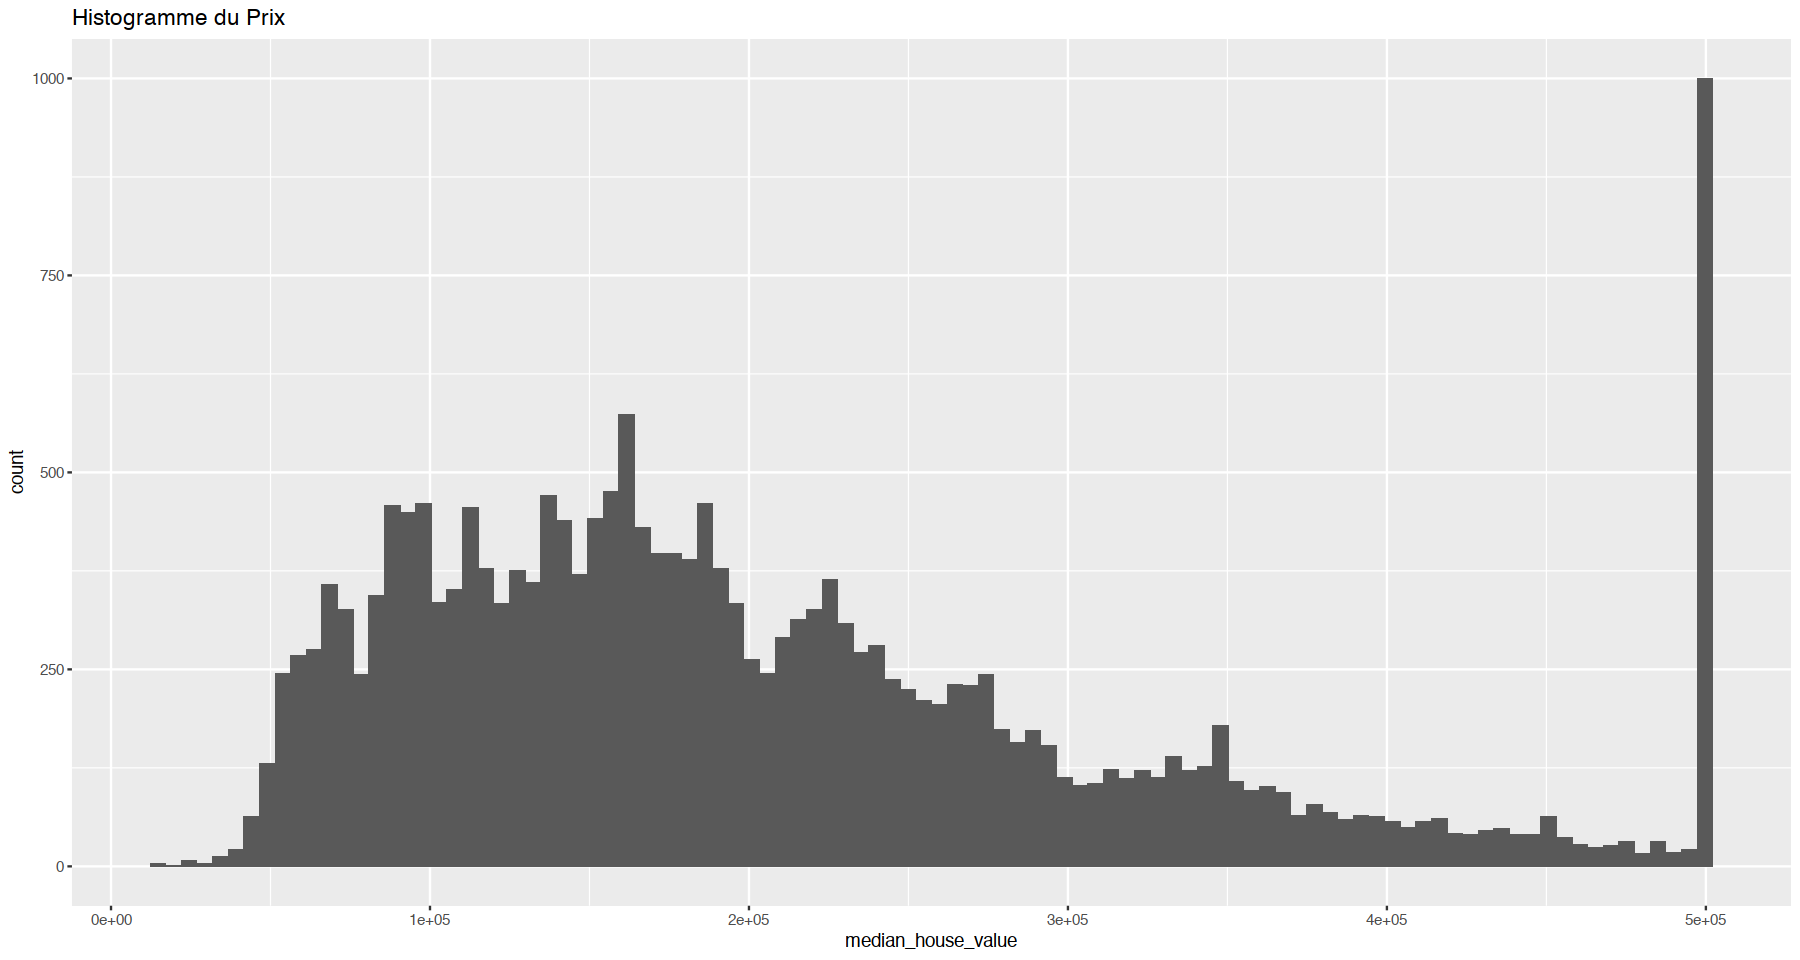

In [43]:
ggplot(maison,aes(x = median_house_value)) +geom_histogram(bins=100) + ggtitle("Histogramme du Prix")

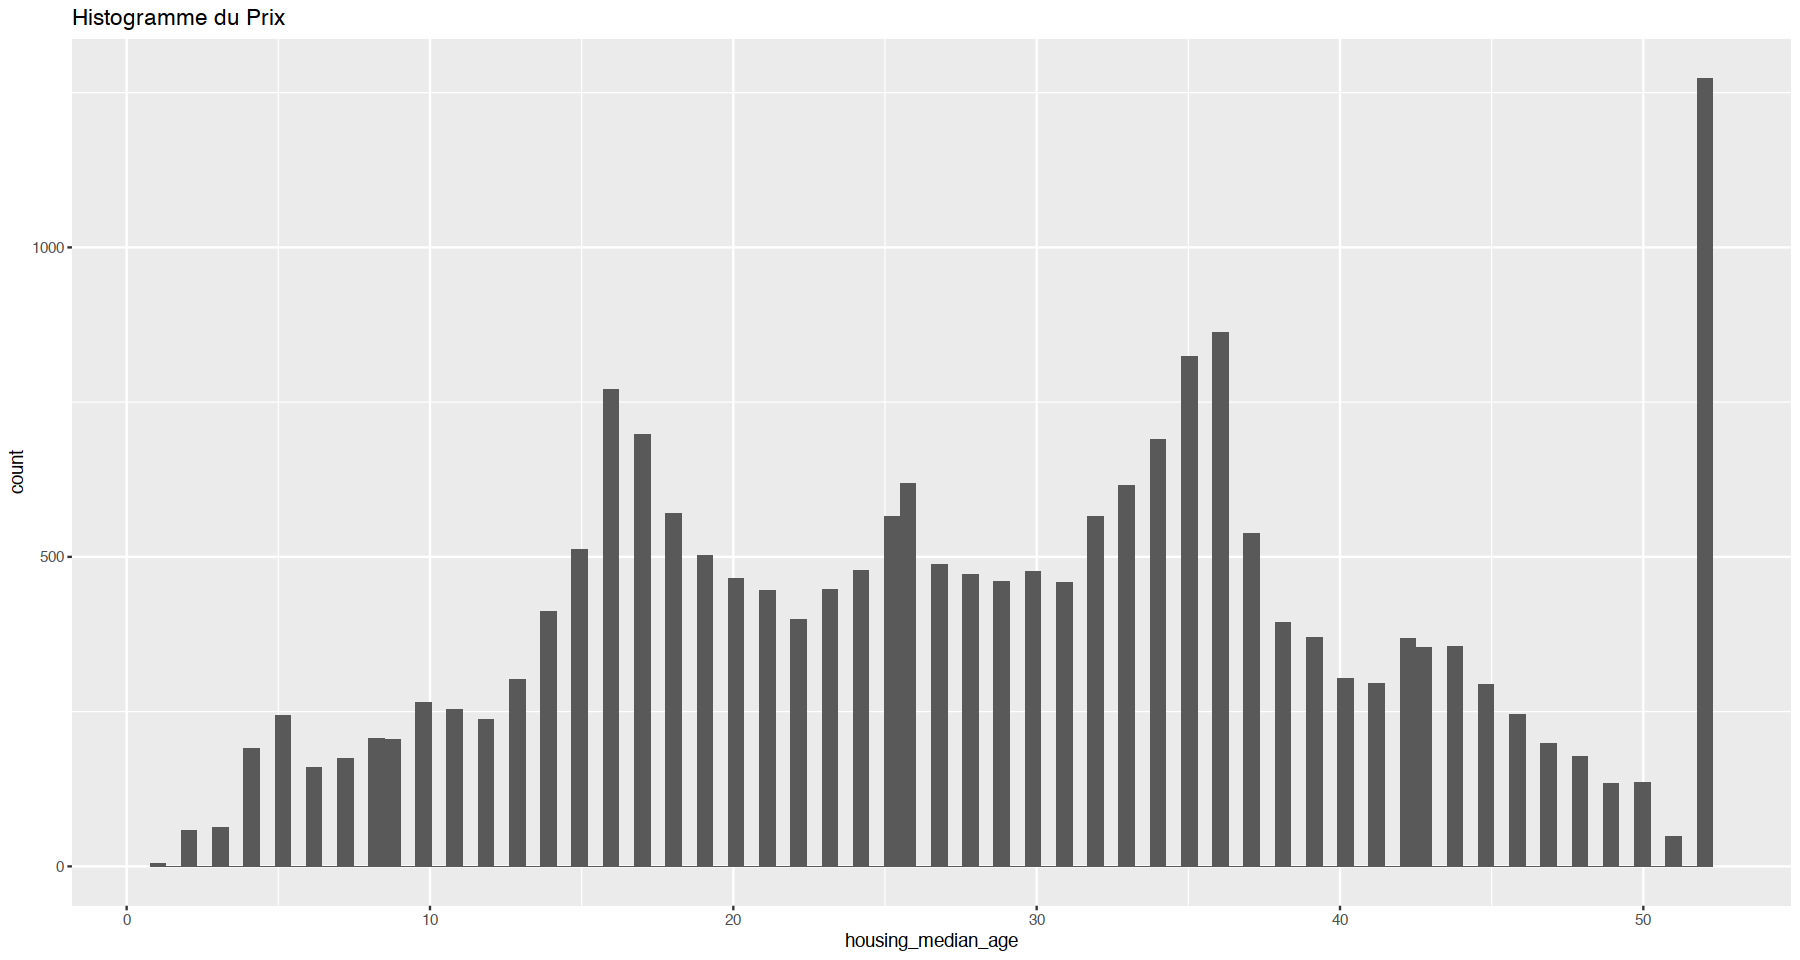

In [44]:
ggplot(maison,aes(x = housing_median_age)) +geom_histogram(bins=100) + ggtitle("Histogramme du Prix")

Nous avons dans ces deux variables des valeurs abérantes, on les supprimes.

### Supprimons les NANs et les Valeurs abérantes

####  NANs

In [45]:
maison$total_bedrooms[is.na(maison$total_bedrooms)] = median(maison$total_bedrooms , na.rm = TRUE)

#### Valeurs Abérantes

In [46]:
maison = filter(maison, median_house_value<500001)
maison = filter(maison, housing_median_age<52)

In [54]:
X1 = maison$median_income
X2 = maison$housing_median_age
Y = maison$median_house_value

# Y?
summary(Y)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  14999  115400  171200  189608  243225  500000 

### 2. Loi de Y `median_house_value`

summary statistics
------
min:  14999   max:  5e+05 
median:  171200 
mean:  189607.6 
estimated sd:  95790.24 
estimated skewness:  0.8339595 
estimated kurtosis:  3.257447 

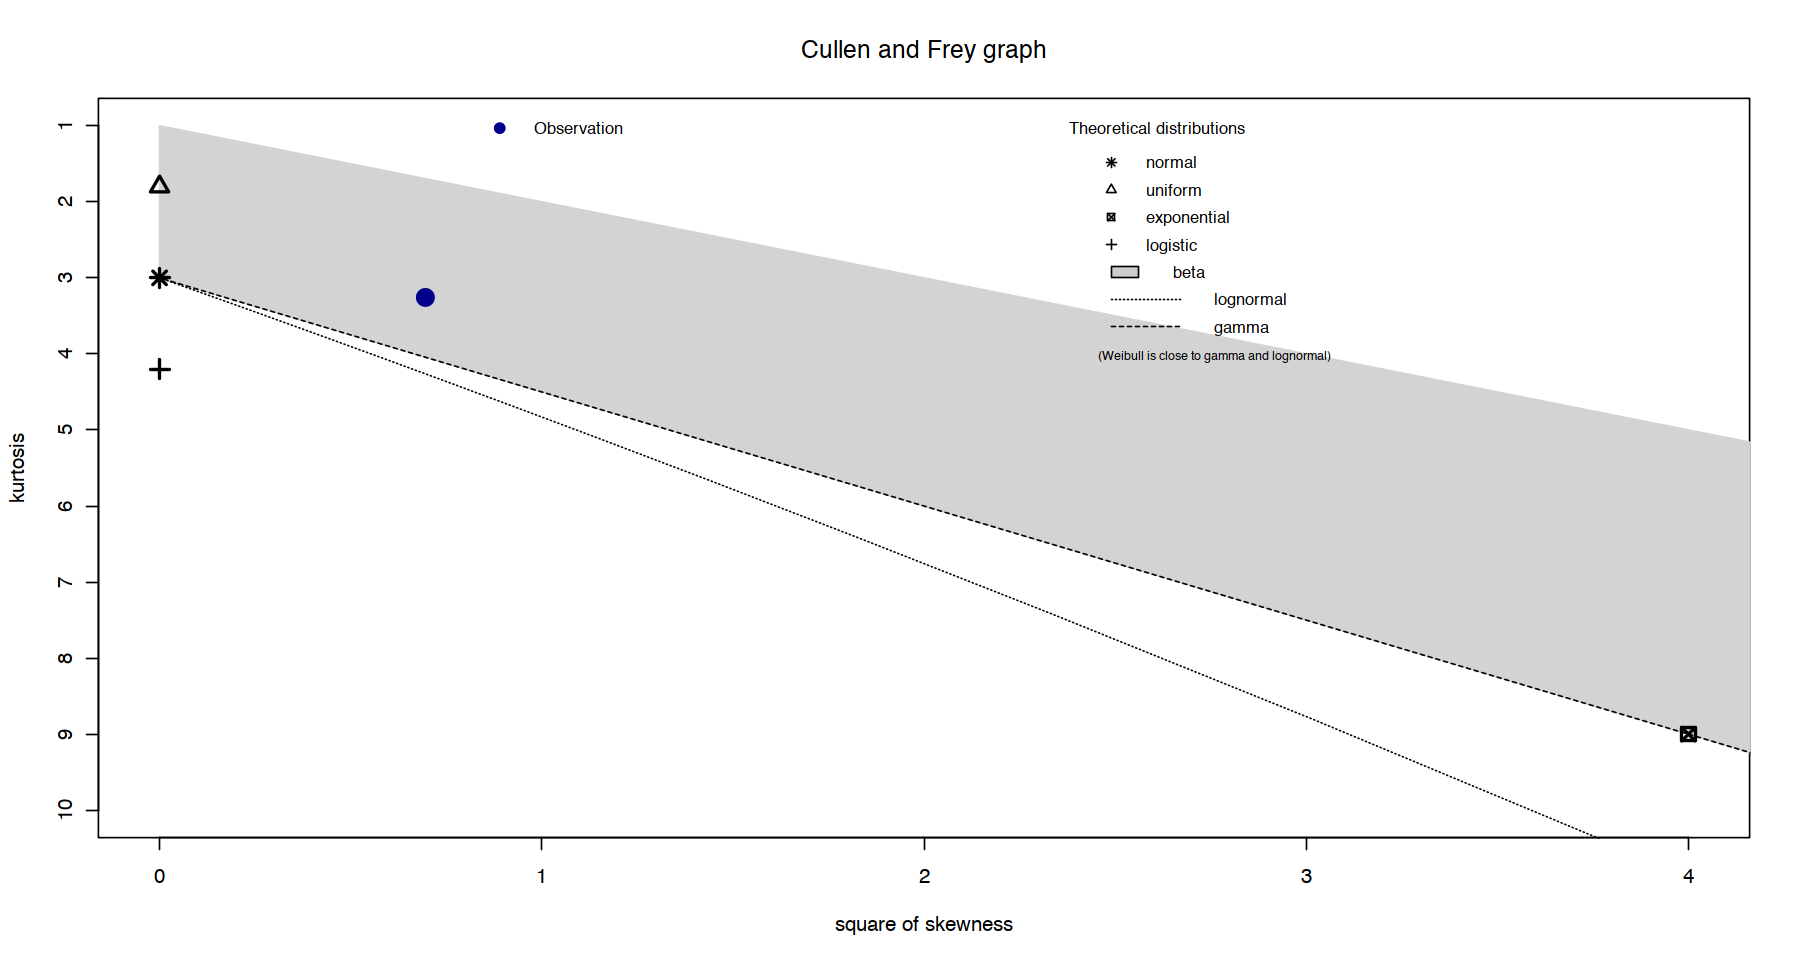

In [55]:
library(fitdistrplus)
descdist(Y, discrete = FALSE)

D'après ces stats notre variable cible median_house_value resemble à une loi normale, avec un coefficient d’aplatissement assez grand et positive.

 ## 3. Test propriétés des estimateurs de la loi normale.

In [123]:
normal_dist_price = fitdist(Y, "gamma")

normal_dist_income = fitdist(X1, "norm")
normal_dist_age = fitdist(X2, "norm")

<simpleError in optim(par = vstart, fn = fnobj, fix.arg = fix.arg, obs = data,     gr = gradient, ddistnam = ddistname, hessian = TRUE, method = meth,     lower = lower, upper = upper, ...): non-finite finite-difference value [2]>


ERROR: Error in fitdist(Y, "gamma"): the function mle failed to estimate the parameters, 
                with the error code 100



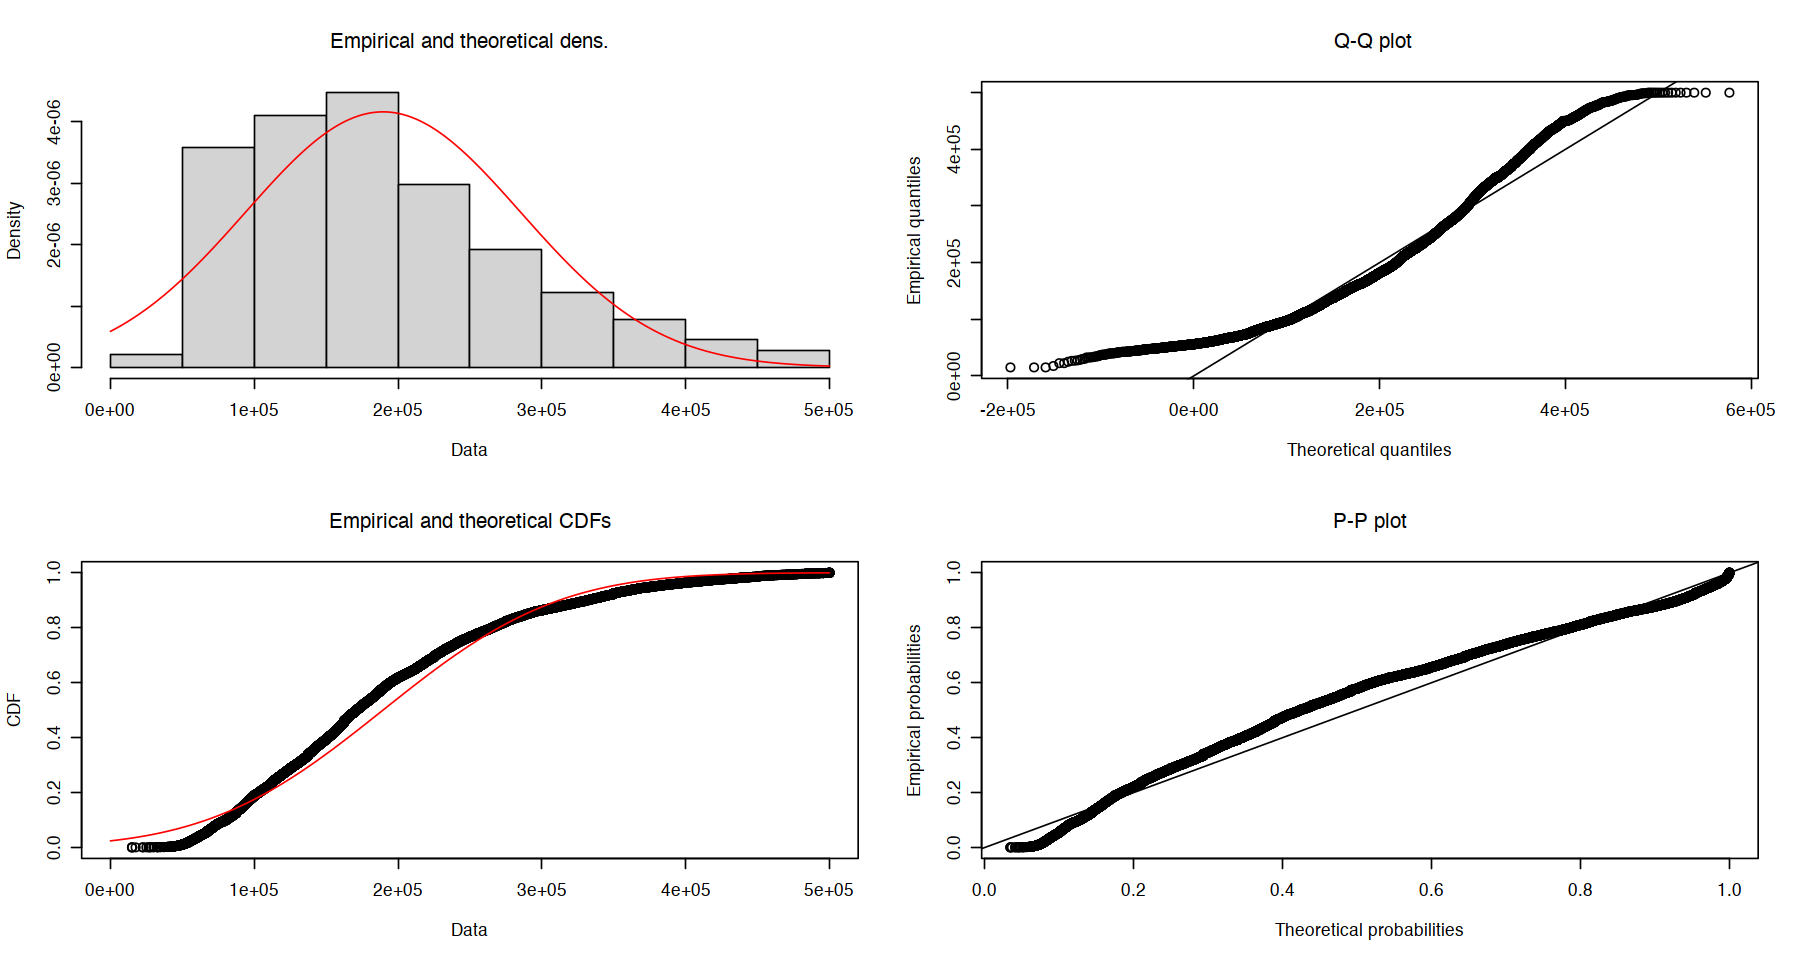

In [124]:
plot(normal_dist_price)

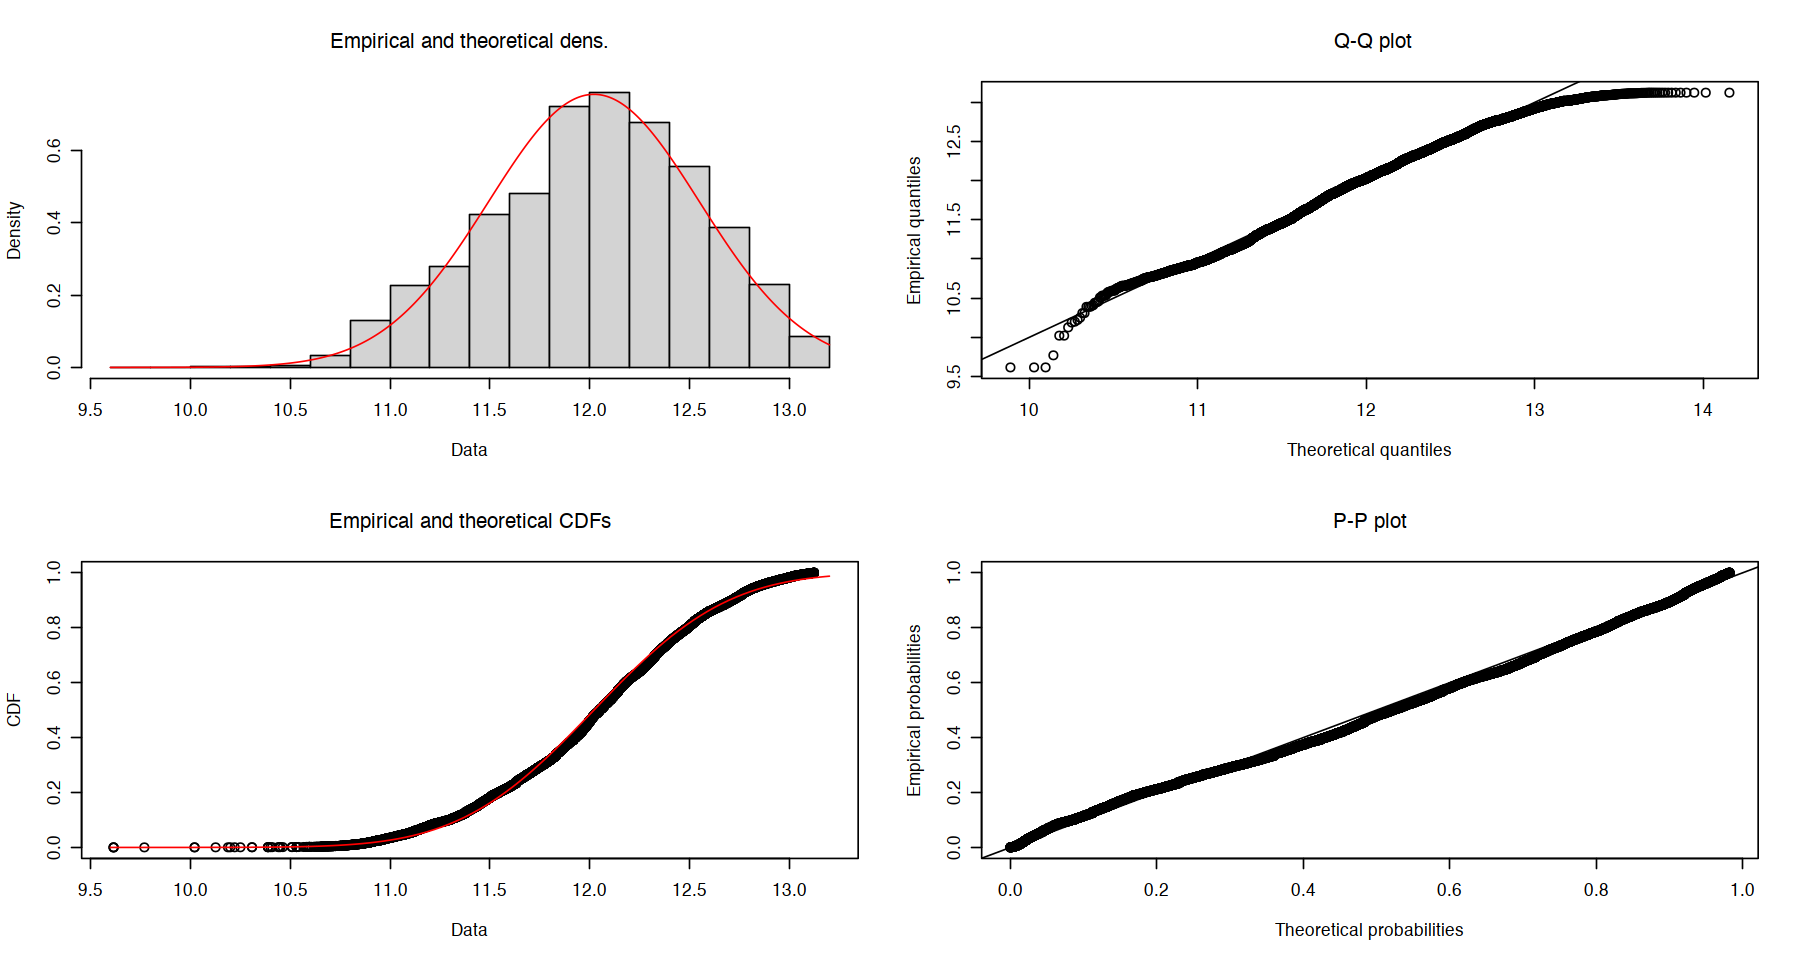

In [81]:
plot(normal_dist_logprice)

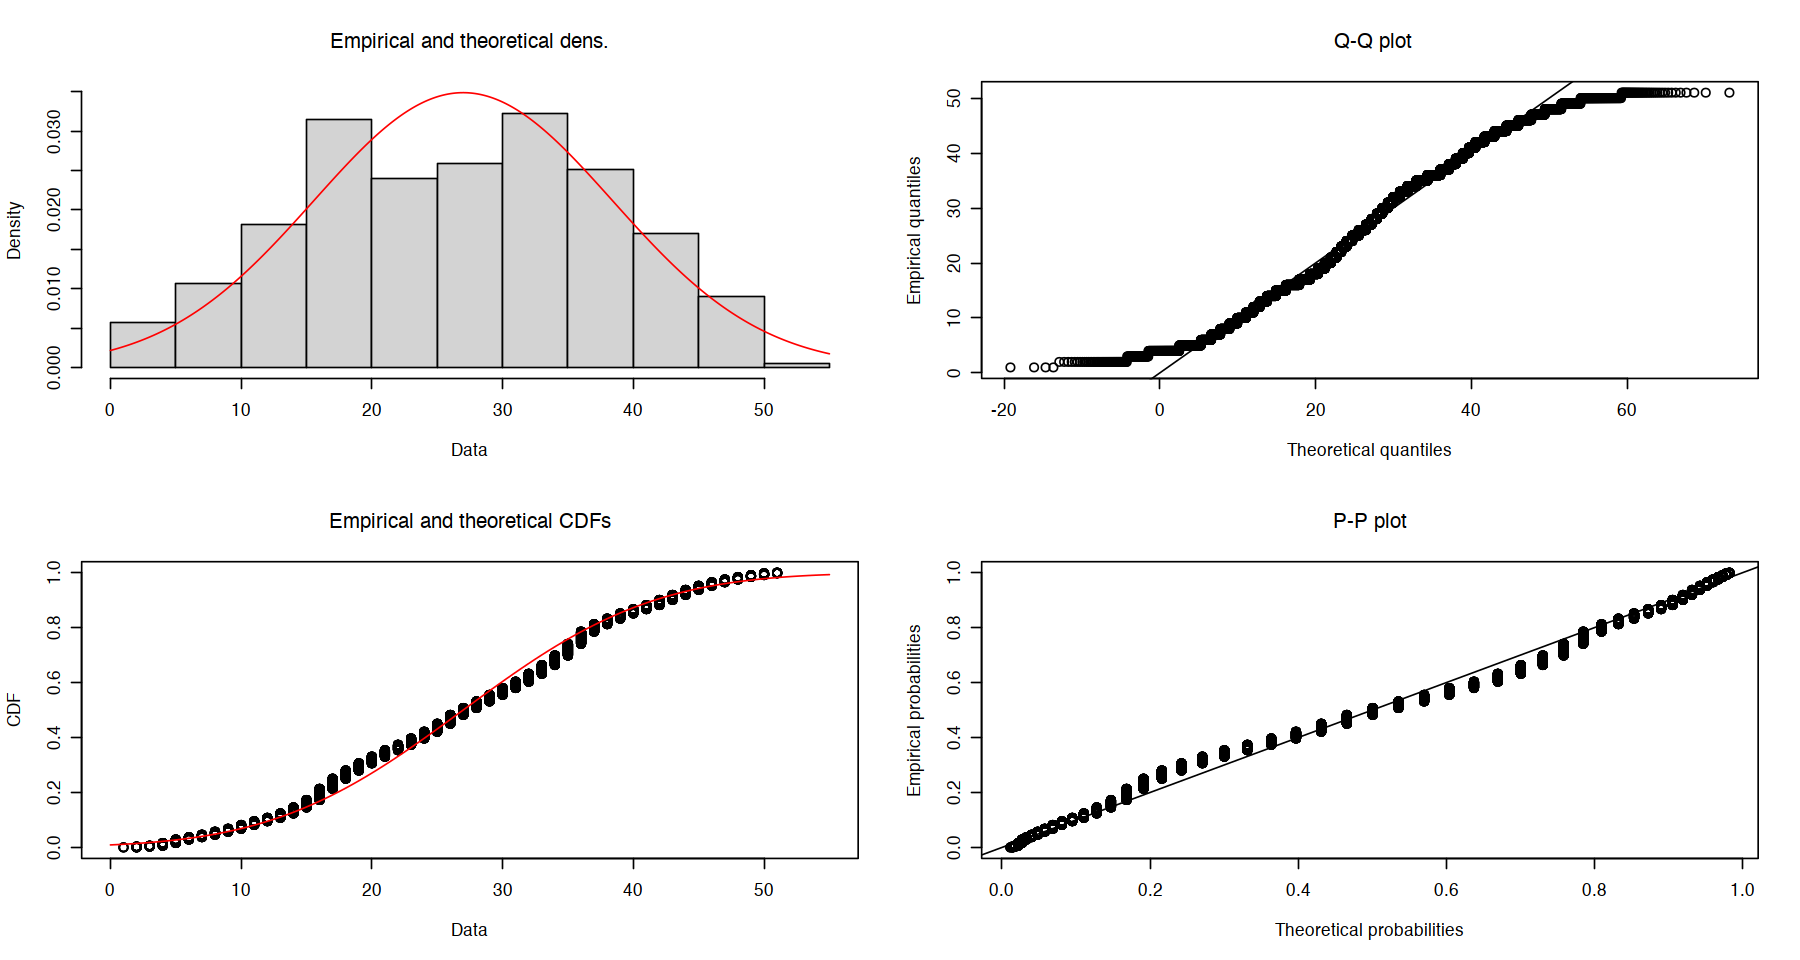

In [61]:
plot(normal_dist_age)

### Test de normalité de S
H0: the data follow a normal distribution  

H1: the data do not follow a normal distribution   

In [94]:
library(nortest)
ad.test(normal_dist_logprice$data)


	Anderson-Darling normality test

data:  normal_dist_logprice$data
A = 41.541, p-value < 2.2e-16


In [109]:
normal_dist_price$estimate

mean        sd 
189607.61  95787.66

In [156]:
set.seed(2020)
fit.gamma <- fitdist(Y/100, distr = "gamma", method = "mle")
summary(fit.gamma)

Fitting of the distribution ' gamma ' by maximum likelihood 
Parameters : 
         estimate   Std. Error
shape 3.959968855 1.745602e-02
rate  0.002088594 5.958711e-06
Loglikelihood:  -152083.5   AIC:  304171.1   BIC:  304186.7 
Correlation matrix:
          shape      rate
shape 1.0000000 0.6200293
rate  0.6200293 1.0000000


In [150]:
fit.gamma$sd

shape         rate 
1.745602e-02 5.958711e-06